**Understanding the Objective**

The goal is to predict the salary of data related positions based on location, company review and job title.







**Import dataset**

In [1]:
from google.colab import files

In [2]:
uploaded = files.upload()

Saving df.csv to df.csv


**Import Libraries**

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import pickle

**Read the data**

In [5]:
df_raw = pd.read_csv("df.csv")

**Data Understanding**

In [6]:
df_raw.head()

,Job Title,Salary Estimate,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,Sector,Revenue
0,Senior Data Scientist,$111K-$181K (Glassdoor est.),3.5,Hopper\n3.5,"New York, NY",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable
1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),4.5,Noom US\n4.5,"New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable
2,Data Science Manager,$111K-$181K (Glassdoor est.),-1.0,Decode_M,"New York, NY",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable
3,Data Analyst,$111K-$181K (Glassdoor est.),3.4,Sapphire Digital\n3.4,"Lyndhurst, NJ",201 to 500 employees,2019,Company - Private,Internet,Information Technology,Unknown / Non-Applicable
4,"Director, Data Science",$111K-$181K (Glassdoor est.),3.4,United Entertainment Group\n3.4,"New York, NY",51 to 200 employees,2007,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable


A few quick things come to mind looking at the above data:


1.   Job titles can be categorized besed on the words they certain such as "director", "data analyst",...
2.   Minimum and maximum salaries can be extracted from the salary estimate and then averaged to column which will be our response variable
3. Company names shouldn't matter much
4. The state where each position is located can be extracted from the location column
5. Because there are too many unknowns in the Revenue column, we will not use that column





**Assess data**

---
In this section we will check the raw data and get an understanding of what kind of data we are dealing with.


In [7]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5892 entries, 0 to 5891
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          5892 non-null   object 
 1   Salary Estimate    5892 non-null   object 
 2   Rating             5892 non-null   float64
 3   Company Name       5892 non-null   object 
 4   Location           5892 non-null   object 
 5   Size               5892 non-null   object 
 6   Founded            5892 non-null   object 
 7   Type of ownership  5892 non-null   object 
 8   Industry           5892 non-null   object 
 9   Sector             5892 non-null   object 
 10  Revenue            5892 non-null   object 
dtypes: float64(1), object(10)
memory usage: 506.5+ KB


**Clean Data**


---


*   Created minimum and maximum salary columns for the positions and parsed the corresponding values out of the raw data
*   Created average salary column
*   Extracted the state where each position is located. Created a state column
*   Tilte column was created to show the different categories for the posted rules such as data engineer, deep learning, analyst..



In [8]:
# Remove instances without salary estimates
df = df_raw[df_raw['Salary Estimate'] != '-1']

In [9]:
# Remove Per Hour salary
df = df[~df['Salary Estimate'].str.contains('Per Hour')]

In [10]:
# Remove $
df['Salary Estimate'] = df['Salary Estimate'].apply(lambda x: x.replace('$', ' '))

<ipython-input-10-34d9ff7e9585>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Salary Estimate'] = df['Salary Estimate'].apply(lambda x: x.replace('$', ' '))


In [11]:
# Remove K
df['Salary Estimate'] = df['Salary Estimate'].apply(lambda x: x.replace('K', ' '))

<ipython-input-11-eca0ac68b3d2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Salary Estimate'] = df['Salary Estimate'].apply(lambda x: x.replace('K', ' '))


In [12]:
# Split it
df['Salary Estimate'] = df['Salary Estimate'].apply(lambda x: x.split())

<ipython-input-12-4741db3930b6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Salary Estimate'] = df['Salary Estimate'].apply(lambda x: x.split())


In [13]:
df['Min_salary'] = df['Salary Estimate'].apply(lambda x: x[0])
df['Max_salary'] = df['Salary Estimate'].apply(lambda x: x[2])

<ipython-input-13-8c48888f6817>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Min_salary'] = df['Salary Estimate'].apply(lambda x: x[0])
<ipython-input-13-8c48888f6817>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Max_salary'] = df['Salary Estimate'].apply(lambda x: x[2])


In [14]:
# Cast Min_salary and Max_salary to int and get the average salary
df['Min_salary'] = df['Min_salary'].apply(lambda x: int(x))
df['Max_salary'] = df['Max_salary'].astype(int)
df['Average_salary'] = (df.Min_salary + df.Max_salary) / 2

<ipython-input-14-a904c7fdb56f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Min_salary'] = df['Min_salary'].apply(lambda x: int(x))
<ipython-input-14-a904c7fdb56f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Max_salary'] = df['Max_salary'].astype(int)
<ipython-input-14-a904c7fdb56f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

In [15]:
# State: what state is the job in
df['State'] = df['Location'].apply(lambda x: x.split()[-1])
df = df[df.State != 'Kingdom'] # remove United Kingdom

<ipython-input-15-46bc8e7a3f6f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['State'] = df['Location'].apply(lambda x: x.split()[-1])


In [16]:
def title_organizer(x):
  """
  This function organizes the job title
  """
  x = x.lower()
  if('data scientist' in x) or ('data science' in x):
    return 'data scientist'
  elif 'data engineer' in x:
    return 'data engineer'
  elif 'deep learning' in x:
    return 'deep learning engineer'
  elif 'machine learing' in x:
    return 'machine learning engineer'
  elif 'director' in x:
    return 'director'
  elif 'manager' in x:
    return 'manager'
  elif 'analyst' in x:
    return 'analyst'
  elif 'researcher' in x:
    return 'researcher'
  else:
    return 'other'

In [17]:
df['Job Title'] = df['Job Title'].apply(title_organizer)

In [18]:
df = df[df['Rating'] != -1]

In [19]:
cleaned_df = df[['Job Title', 'Rating', 'Average_salary', 'State']]

In [20]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4891 entries, 0 to 5887
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Job Title       4891 non-null   object 
 1   Rating          4891 non-null   float64
 2   Average_salary  4891 non-null   float64
 3   State           4891 non-null   object 
dtypes: float64(2), object(2)
memory usage: 191.1+ KB


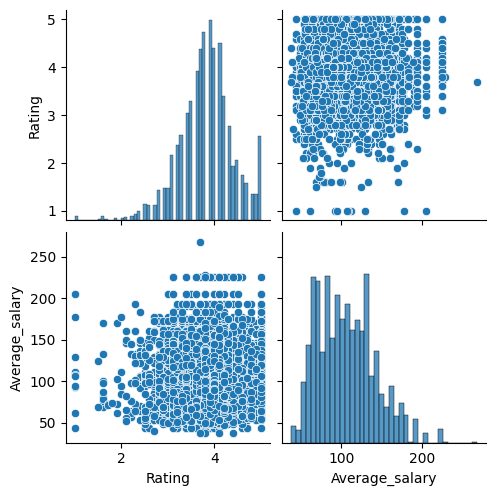

In [21]:
sns.pairplot(cleaned_df)

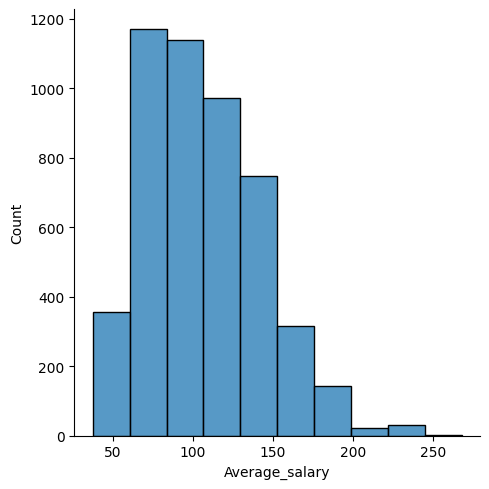

In [22]:
sns.displot(x='Average_salary', data = cleaned_df, bins = 10)

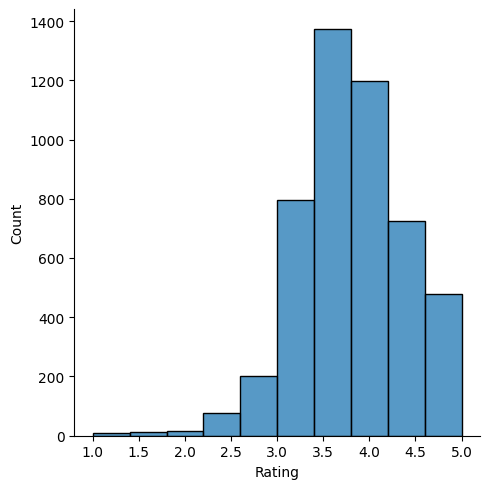

In [23]:
sns.displot(x="Rating", data = cleaned_df, bins = 10)

<Axes: xlabel='Rating', ylabel='Average_salary'>

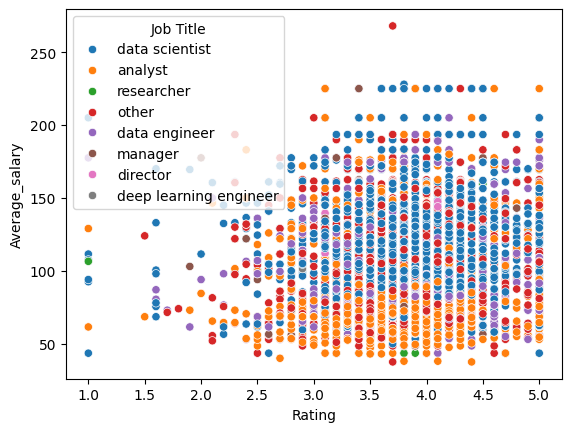

In [24]:
sns.scatterplot(x='Rating', y="Average_salary", data = cleaned_df, hue='Job Title')

**Feature Engineering**

In [25]:
preprocessed_df = pd.get_dummies(cleaned_df, columns=["Job Title", "State"])

In [26]:
X = preprocessed_df.drop(columns='Average_salary')

In [27]:
y = preprocessed_df['Average_salary']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [29]:
lr = LinearRegression()

In [30]:
lr.fit(X_train, y_train)

LinearRegression()

In [31]:
# Prediction
predictions = lr.predict(X_test)
predictions

array([101.875, 126.375,  90.875, ...,  85.125,  94.625,  94.25 ])

<Axes: xlabel='Average_salary'>

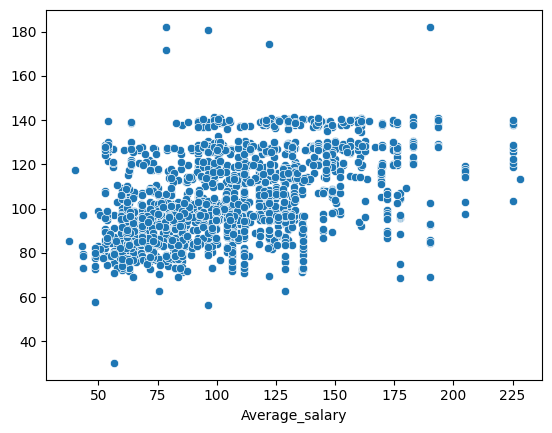

In [32]:
sns.scatterplot(x=y_test, y=predictions)

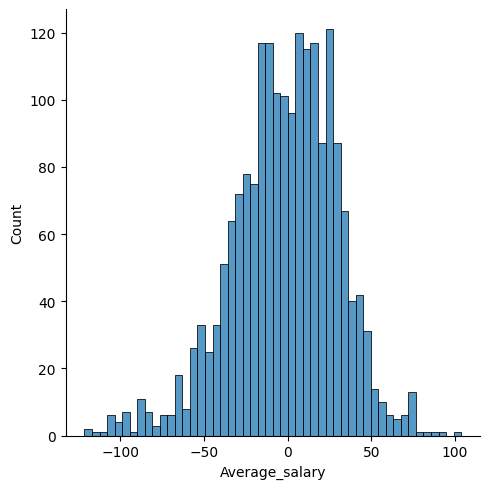

In [33]:
residual = predictions - y_test
sns.displot(residual, bins=50)

In [34]:
print('MAE: ', mean_absolute_error(y_test, predictions))

MAE:  24.6789090444558


In [35]:
pickle.dump(lr, open('Salary_Estimater.pkl', 'wb'))